In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from polinomialRegressao import RegressaoPolinomialSemRegularizacao, RegressaoPolinomialComRegularizacao



In [2]:

data = pd.read_csv('boston.csv')

# Separar os atributos (X) e a saída (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1,1)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:


# Normalizar os dados de treinamento
escala = MinMaxScaler()
X_normalizado_treino = escala.fit_transform(X_treino)

# Normalizar os dados de teste
X_normalizado_teste = escala.transform(X_teste)

escala_saida=MinMaxScaler()
y_normalizado_treino = escala_saida.fit_transform(y_treino)
y_normalizado_teste= escala_saida.fit_transform(y_teste)


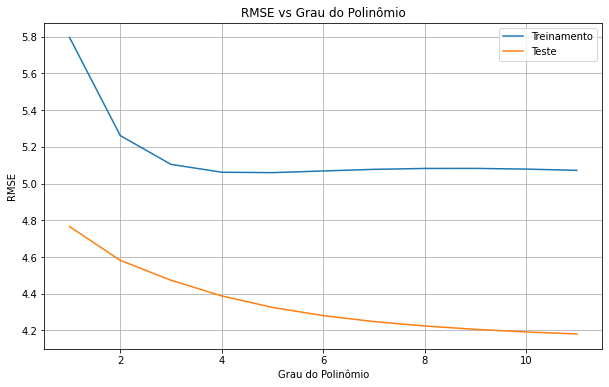

In [6]:

rmse_treino = []
rmse_teste = []
graus = range(1, 12)
# Iterar sobre diferentes graus de polinômio
for grau in graus:
    # Criar e treinar o modelo
    modelo = RegressaoPolinomialSemRegularizacao(grau=grau, a=0.01, epocas=2000)
    modelo.fit_gd(X_normalizado_treino, y_normalizado_treino)
    
    previsao = modelo.predict(X_normalizado_treino)
    y_desnormalizado_treino = escala_saida.inverse_transform(previsao.reshape(-1,1))
        
    previsao0 = modelo.predict(X_normalizado_teste)
    y_desnormalizado_teste = escala_saida.inverse_transform(previsao0.reshape(-1,1))
    
    
    # Calcular o RMSE para os dados de treinamento e teste
    rmse_treino.append(modelo.calcular_rmse(y_treino, y_desnormalizado_treino))
    rmse_teste.append(modelo.calcular_rmse(y_teste, y_desnormalizado_teste))

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(graus, rmse_treino, label='Treinamento')
plt.plot(graus, rmse_teste, label='Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE vs Grau do Polinômio')
plt.legend()
plt.grid(True)
plt.show()


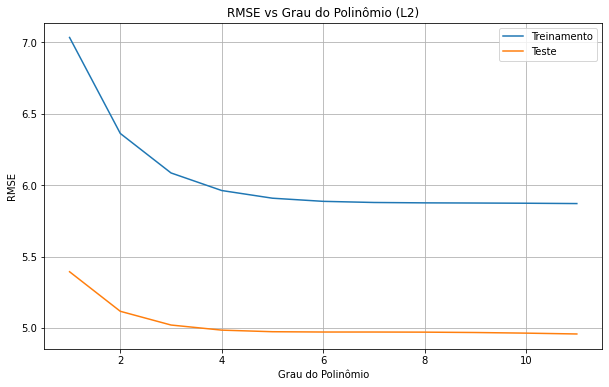

In [7]:
# Lista para armazenar os valores de RMSE
rmse_l2_treino = []
rmse_l2_teste = []


# Loop pelos diferentes graus do polinômio
for grau in graus:
    # Inicializar o modelo de regressão polinomial com regularização Ridge
    modelo2 = RegressaoPolinomialComRegularizacao(grau, 0.01, 2000, 0.1)
    
    modelo2.fit_gd(X_normalizado_treino, y_normalizado_treino)
    
    previsao1 = modelo2.predict(X_normalizado_treino)
    y_desnormalizado_treino = escala_saida.inverse_transform(previsao1.reshape(-1,1))
        
    previsao2 = modelo2.predict(X_normalizado_teste)
    y_desnormalizado_teste = escala_saida.inverse_transform(previsao2.reshape(-1,1))
    
    
    # Calcular o RMSE para os dados de treinamento e teste
    rmse_l2_treino.append(modelo.calcular_rmse(y_treino, y_desnormalizado_treino))
    rmse_l2_teste.append(modelo.calcular_rmse(y_teste, y_desnormalizado_teste))

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(graus, rmse_l2_treino, label='Treinamento')
plt.plot(graus, rmse_l2_teste, label='Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE vs Grau do Polinômio (L2)')
plt.legend()
plt.grid(True)
plt.show()